In [22]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
import matplotlib.pyplot as plt

In [23]:
# Useful functions
def IsScalar(x):
    if type(x) in (list, np.ndarray,):
        return False
    else:
        return True

def Thresh(x):
    if IsScalar(x):
        val = 1 if x>0 else -1
    else:
        val = np.ones_like(x)
        val[x<0] = -1.
    return val

def Hamming(x, y):
    '''
        d = Hamming(x,y)
        
        Hamming distance between two binary vectors x and y.
        It's the number of digits that differ.
        
        Inputs:
          x and y are arrays of binary vectors, and can be either {0,1} or {-1,1}
        
        Output:
          d is the number of places where the inputs differ
    '''
    d = []
    for xx, yy in zip(x,y):
        dd = 0.
        for xxx,yyy in zip(xx,yy):
            if xxx==1 and yyy!=1:
                dd += 1.
            elif yyy==1 and xxx!=1:
                dd += 1.
        d.append(dd)
    return d

def Perturb(x, p=2):
    '''
        y = Perturb(x, p=0.1)
        
        Apply binary noise to x. With probability p, each bit will be randomly
        set to -1 or 1.
        
        Inputs:
          x is an array of binary vectors of {-1,1}
          p is the probability of each bit being randomly flipped
        
        Output:
          y is an array of binary vectors of {-1,1}
    '''
    y = copy.deepcopy(x)
    for yy in y:
        perm = random.sample(range(len(yy)), p)  # Randomly select p indices to flip
        for v in perm:
            yy[v] *= -1  # Flip the selected bit
    return y

In [24]:
V = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
              [ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1],
             ])

V.shape

(2, 16)

In [25]:

'''while (1):
    V_not = Perturb(V,p=0.7)
    tempV = V_not@V_not.T
    is_diagonal = True
    for i in range(tempV.shape[0]):
        for j in range(tempV.shape[1]):
            if i != j and tempV[i][j] < 10 and tempV[i][j] > 0:
                is_diagonal = False
                break

    if is_diagonal:
        break

V=V_not
'''
print(V)
print(V@V.T)

[[ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]]
[[16  0]
 [ 0 16]]


In [26]:
N = np.shape(V)[1]
n = 2

b = np.zeros((1, N))
for i in range(N):
    sum = 0
    j = 0
    while (j < n):
        sum = sum + V[j][i]
        j += 1
    b[0, i] = float(sum / n)

print(b)

W = (V.T@V)/n - np.eye(N)

print(W)


[[ 1.  0.  1.  0.  1.  0.  1.  0.  0. -1.  0. -1.  0. -1.  0. -1.]]
[[ 0.  0.  1.  0.  1.  0.  1.  0.  0. -1.  0. -1.  0. -1.  0. -1.]
 [ 0.  0.  0.  1.  0.  1.  0.  1. -1.  0. -1.  0. -1.  0. -1.  0.]
 [ 1.  0.  0.  0.  1.  0.  1.  0.  0. -1.  0. -1.  0. -1.  0. -1.]
 [ 0.  1.  0.  0.  0.  1.  0.  1. -1.  0. -1.  0. -1.  0. -1.  0.]
 [ 1.  0.  1.  0.  0.  0.  1.  0.  0. -1.  0. -1.  0. -1.  0. -1.]
 [ 0.  1.  0.  1.  0.  0.  0.  1. -1.  0. -1.  0. -1.  0. -1.  0.]
 [ 1.  0.  1.  0.  1.  0.  0.  0.  0. -1.  0. -1.  0. -1.  0. -1.]
 [ 0.  1.  0.  1.  0.  1.  0.  0. -1.  0. -1.  0. -1.  0. -1.  0.]
 [ 0. -1.  0. -1.  0. -1.  0. -1.  0.  0.  1.  0.  1.  0.  1.  0.]
 [-1.  0. -1.  0. -1.  0. -1.  0.  0.  0.  0.  1.  0.  1.  0.  1.]
 [ 0. -1.  0. -1.  0. -1.  0. -1.  1.  0.  0.  0.  1.  0.  1.  0.]
 [-1.  0. -1.  0. -1.  0. -1.  0.  0.  1.  0.  0.  0.  1.  0.  1.]
 [ 0. -1.  0. -1.  0. -1.  0. -1.  1.  0.  1.  0.  0.  0.  1.  0.]
 [-1.  0. -1.  0. -1.  0. -1.  0.  0.  1.  0.  1.  0.  0.  0.

In [27]:
def update(x, X, b, c):
    y = x.copy()  # create a copy of x to avoid modifying it directly
    y[0, c] = x @ X[:, c] - b[0, c]
    y = Thresh(y)  # assign the result of Thresh(y) back to y
    return y
    

In [28]:
def Energy(W, b, x):
    E = - 0.5 * (x @ W)@x.T + b@x.T
    return E

In [29]:
import itertools

# Generate all possible permutations of a 16-dimensional bipolar vector
all_permutations = itertools.product([-1, 1], repeat=16)

# Iterate over all permutations and perform your desired action
min_e = 0 
max_e = -100
for p in all_permutations:
    vector = np.array(p)
    energy = Energy(W,b,vector)
    if energy<min_e:
        min_e=energy
    if energy>max_e:
        max_e=energy
        
print(min_e)
print(max_e)



[-64.]
[8.]


[[ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1]] stored state
[[ 1  1  1  1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1]] noisy input state
distance between noisy input state and stored state:  [4.0]

[[ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1]]
distance between stable state and stored state:  [0.0]


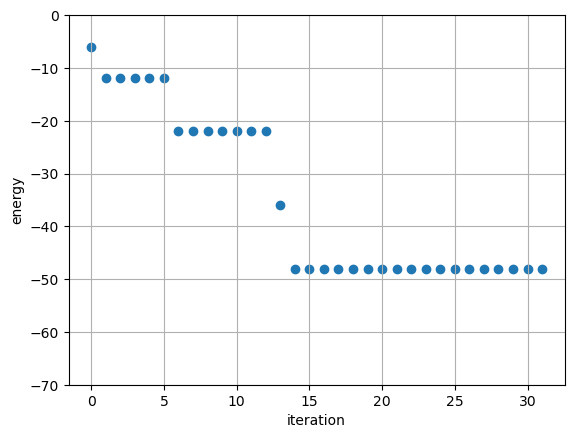

In [30]:
P = Perturb(V, p=4)#perturbed input state matrix
#k = np.random.randint(len(V))
k=0
in_k=P[k:k+1,]#perturbed input state
in_V_k=V[k:k+1,]# setting in_V_k to be from the k-th column to the (k+1)_th column thus only the k-th collumn since RHS of : is not included(excluded in the list)

print(in_V_k,'stored state', sep=' ')#printing the training state that was perturbed
print(in_k,'noisy input state', sep=' ')#printing the perturbation that's being fed as input
print('distance between noisy input state and stored state: ', Hamming(in_k, in_V_k))
print()

perm = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
iter = 2
k = 0
e =  np.zeros(iter*len(perm))
for i in range(iter):
    random.shuffle(perm)
    for j in range(len(perm)):
        e[k] = Energy(W, b, in_k)
        c=perm[j]
        y = update(in_k, W, b, c)
        #print('dist: ', Hamming(in_k, y), '  energy: ', Energy(W, b, y))
        k=k+1
        in_k = y

#print()
print(in_k)      
print('distance between stable state and stored state: ', Hamming(in_k, in_V_k))


h = iter*len(perm)  # Set the domain size

# Generate the x-axis data points (domain)
dom = np.arange(h)

# Create the scatter plot
plt.scatter(dom, e)

# Set the axis labels
plt.xlabel('iteration')
plt.ylabel('energy')

# Increase y-axis resolution
y_ticks = np.arange(-70, 10, 10)  # Adjust the step size (5 in this case) for higher or lower resolution
plt.yticks(y_ticks)

# Display the plot
plt.grid(True)
plt.show()
    